In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import pickle
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv("Covid Datasets.csv")
df.head()
df.shape

(5434, 21)

In [3]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [4]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [49]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [5]:
df.drop(['Wearing Masks','Sanitization from Market'],axis=1,inplace=True)

In [6]:
## Converting Categorical data to numerical data
le=LabelEncoder()
df['Breathing Problem']=le.fit_transform(df['Breathing Problem'])
df['Fever']=le.fit_transform(df['Fever'])
df['Dry Cough']=le.fit_transform(df['Dry Cough'])
df['Sore throat']=le.fit_transform(df['Sore throat'])
df['Running Nose']=le.fit_transform(df['Running Nose'])
df['Asthma']=le.fit_transform(df['Asthma'])
df['Chronic Lung Disease']=le.fit_transform(df['Chronic Lung Disease'])
df['Headache']=le.fit_transform(df['Headache'])
df['Heart Disease']=le.fit_transform(df['Heart Disease'])
df['Diabetes']=le.fit_transform(df['Diabetes'])
df['Hyper Tension']=le.fit_transform(df['Hyper Tension'])
df['Fatigue ']=le.fit_transform(df['Fatigue '])

df['Gastrointestinal ']=le.fit_transform(df['Gastrointestinal '])
df['Abroad travel']=le.fit_transform(df['Abroad travel'])
df['Contact with COVID Patient']=le.fit_transform(df['Contact with COVID Patient'])
df['Attended Large Gathering']=le.fit_transform(df['Attended Large Gathering'])
df['Visited Public Exposed Places']=le.fit_transform(df['Visited Public Exposed Places'])
df['Family working in Public Exposed Places']=le.fit_transform(df['Family working in Public Exposed Places'])
df['COVID-19']=le.fit_transform(df['COVID-19'])
df['Sore throat']=le.fit_transform(df['Sore throat'])

df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1


In [7]:
X = df.drop(['COVID-19'],axis=1)
y = df['COVID-19']

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape,X_test.shape

((4347, 18), (1087, 18))

In [10]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
           "SVM": svm.SVC(kernel="rbf")}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [11]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.9714811407543699,
 'Logistic Regression': 0.9724011039558418,
 'Random Forest': 0.984360625574977,
 'SVM': 0.984360625574977}

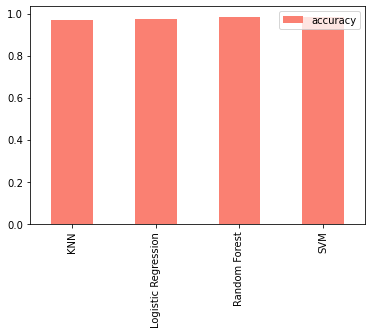

In [12]:
model_compare = pd.DataFrame(model_scores , index=['accuracy'])
model_compare.T.plot(kind="bar",color='salmon');

In [13]:
#using grid_search_cv
from sklearn.model_selection import GridSearchCV
rf_grid = {"n_estimators":[100, 200, 300, 1000],
           "max_depth":[80, 90, 100, 110],
            "max_features":[2, 3],
            "min_samples_split":[8, 10, 12],
             "min_samples_leaf":[3, 4, 5]}
np.random.seed(42)

gs_rf_model = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose= True)
gs_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=True)

In [14]:
gs_rf_model.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [15]:
rf_model = RandomForestClassifier(max_depth= 80,
                                  max_features= 3,
                                  min_samples_leaf= 3,
                                  min_samples_split=8,
                                  n_estimators=300)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)

In [16]:
rf_model.score(X_test,y_test)

0.984360625574977

In [17]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svm = GridSearchCV(svm.SVC(), param_grid_svm, refit = True, verbose = 3)
  
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.919 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.970 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.978 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.980 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.983 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.974 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.982 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.978 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [18]:
grid_svm.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [19]:
svm_model = svm.SVC(C= 1000, gamma= 0.01, kernel= 'rbf')
svm_model.fit(X_train,y_train)

SVC(C=1000, gamma=0.01)

In [20]:
svm_model.score(X_test,y_test)

0.984360625574977

In [21]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [22]:
svc_model = svm.SVC(C=10, gamma= 0.1, kernel='rbf')
svc_model.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [23]:
svc_model.score(X_test,y_test)

0.984360625574977

## Feature Importance

In [24]:
rf_model.feature_importances_

array([0.13718517, 0.07482826, 0.12452819, 0.14628971, 0.02116394,
       0.01898128, 0.01793251, 0.01607428, 0.01927343, 0.01449459,
       0.0190686 , 0.01805392, 0.01748967, 0.14075429, 0.075195  ,
       0.0944166 , 0.01905909, 0.02521147])

<BarContainer object of 18 artists>

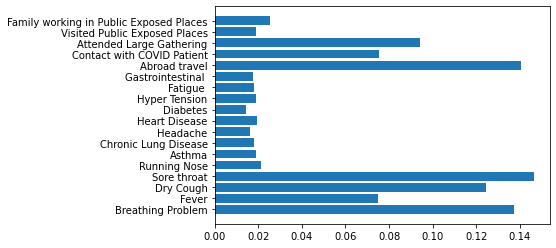

In [25]:
#Let’s plot the importances (chart will be easier to interpret than values).
plt.barh(X.columns,rf_model.feature_importances_)

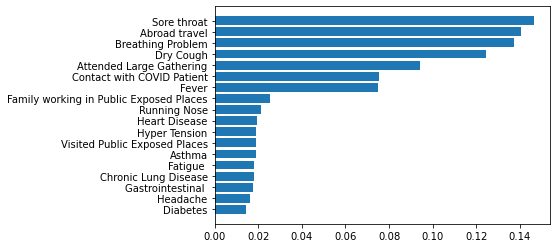

In [26]:
sorted = rf_model.feature_importances_.argsort()
plt.barh(X.columns[sorted],rf_model.feature_importances_[sorted]);

## Feature Importance Computed with SHAP Values

In [27]:
import shap

In [28]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

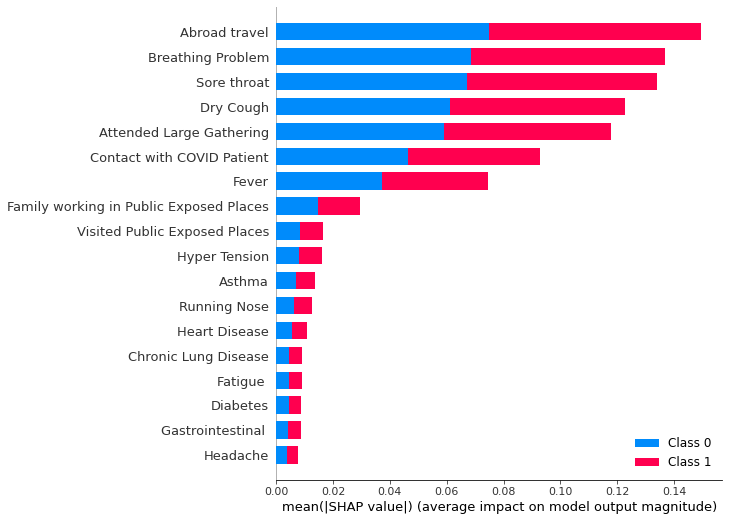

In [29]:
shap.summary_plot(shap_values, X_test, plot_type="bar");

## Permutation Based Feature Importance

Text(0.5, 0, 'Permutation Importance')

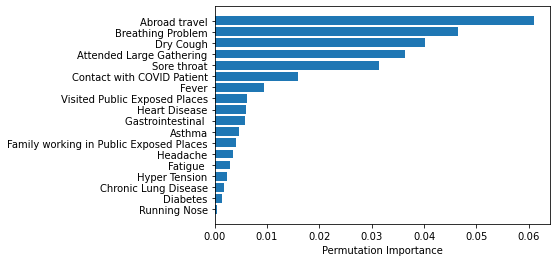

In [53]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf_model, X_test, y_test)
sorted_index = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_index], perm_importance.importances_mean[sorted_index])
plt.xlabel("Permutation Importance")

## prediction

In [44]:
y_preds = rf_model.predict(X_test)
y_preds

array([1, 0, 1, ..., 1, 1, 1])

## Confusion Matrix

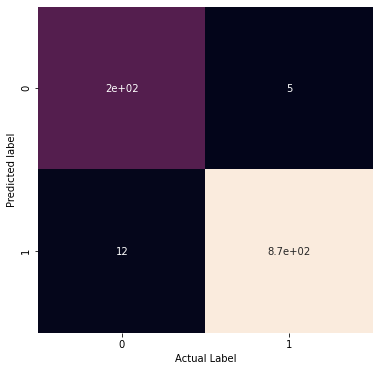

In [45]:
import seaborn as sns

#sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    conf_mat = confusion_matrix(y_test,y_preds)
    
    fig,ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(conf_mat,annot=True,cbar=False)
    
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

## Classification report

In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087



## Saving model

In [ ]:
pickle.dump(rf_model,open("rf_model.pkl","wb"))